# Trees Based Modeling

## Simple Trees

### Tree 1

In [17]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

#read data into data frame, data
data = pd.read_csv(r'C:\Users\hisha\Desktop\Certfication\FlightDelays.csv')

# Fill missing values with mean column values in the data set
data.fillna(data.mean(), inplace=True)

#drop the columns that we don't need!
data = data.drop(['DEST','ORIGIN','DAY_WEEK','DAY_OF_MONTH'], axis=1)

#convert category, Sex, into a number (0 = Female, 1 = Male)
labelEncoder = LabelEncoder()
labelEncoder.fit(data['Flight Status'])
data['Flight Status'] = labelEncoder.transform(data['Flight Status'])

#labelEncoder = LabelEncoder()
#labelEncoder.fit(data['ORIGIN'])
#data['ORIGIN'] = labelEncoder.transform(data['ORIGIN'])

#labelEncoder = LabelEncoder()
#labelEncoder.fit(data['DEST'])
#data['DEST'] = labelEncoder.transform(data['DEST'])

labelEncoder = LabelEncoder()
labelEncoder.fit(data['CARRIER'])
data['CARRIER'] = labelEncoder.transform(data['CARRIER'])

#list all of the predictors that are left
predictors = ['DEP_TIME','Weather','FL_NUM','TIME_SLOT','CARRIER']

#set up target, predictors, and split the training/testing partitions
X = data[predictors]
y = data['Flight Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

#create the decision tree
estimator = DecisionTreeClassifier()
estimator.fit(X_train, y_train)

#This block of code creates a table of 29 different trees, using the Gini and
# entropy methods of purity checks, prints the accuracy of each model
print('depth','gini ','entropy')
for i in range(1,41):
    dtree = DecisionTreeClassifier(criterion='gini', max_depth=i)
    dtree.fit(X_train, y_train)
    pred = dtree.predict(X_test)
    gini_score = accuracy_score(y_test, pred)
    ####
    dtree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
    dtree.fit(X_train, y_train)
    pred = dtree.predict(X_test)
    entropy_score = accuracy_score(y_test, pred)

    #print(i,round(gini_score,3),round(entropy_score,3))
    print(f'{i:<6}{round(gini_score,3):<6}{round(entropy_score,3)}')
    ####

print()
print()

depth gini  entropy
1     0.814 0.814
2     0.82  0.814
3     0.82  0.832
4     0.838 0.838
5     0.832 0.838
6     0.84  0.837
7     0.837 0.85
8     0.862 0.856
9     0.853 0.855
10    0.855 0.861
11    0.867 0.853
12    0.847 0.84
13    0.846 0.849
14    0.847 0.846
15    0.844 0.843
16    0.841 0.834
17    0.837 0.835
18    0.835 0.821
19    0.832 0.823
20    0.832 0.832
21    0.834 0.831
22    0.834 0.829
23    0.835 0.832
24    0.835 0.829
25    0.835 0.832
26    0.834 0.829
27    0.834 0.831
28    0.837 0.828
29    0.837 0.828
30    0.835 0.831
31    0.834 0.829
32    0.834 0.826
33    0.831 0.831
34    0.834 0.829
35    0.834 0.831
36    0.838 0.828
37    0.837 0.829
38    0.835 0.828
39    0.834 0.831
40    0.835 0.831




In [18]:

#create the final tree with the suggested depth from the above code block
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=3)
dtree.fit(X_train, y_train)

#test the model against our new model and calculate the accuracy
pred = dtree.predict(X_test)
print("Accuracy:", round(accuracy_score(y_test, pred),3))

#create confusion matrix and print it
confusionMatrix = pd.DataFrame(
    confusion_matrix(y_test, pred),
    columns=['Predicted Delay', 'Predicted Not Delay'],
    index=['True Delay', 'True No Delay']
)
print(confusionMatrix)
print()


Accuracy: 0.832
               Predicted Delay  Predicted Not Delay
True Delay                  21                  109
True No Delay                2                  529



   predictor  importance
1    Weather       0.348
3  TIME_SLOT       0.301
0   DEP_TIME       0.288
2     FL_NUM       0.062
4    CARRIER       0.000



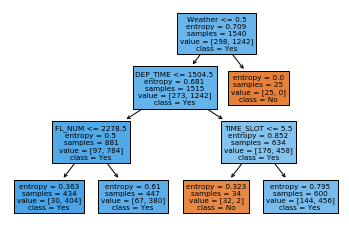

In [19]:

#create a list of features and orders them 
importances = pd.DataFrame({'predictor':X_train.columns,'importance':np.round(dtree.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
print(importances)
print()

#the next four lines of code will create the decision tree graphically.  
plt.figure()
plot_tree(dtree, filled=True, feature_names=predictors, class_names=['No','Yes'])
plt.savefig('treePlot.pdf')
plt.show()


### Tree 2

In [20]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

#read data into data frame, data
data = pd.read_csv(r'C:\Users\hisha\Desktop\Certfication\FlightDelays.csv')

# Fill missing values with mean column values in the data set
data.fillna(data.mean(), inplace=True)

#drop the columns that we don't need!
data = data.drop(['DEP_TIME','DAY_OF_MONTH','DAY_WEEK','ORIGIN','FL_NUM','DEST'], axis=1)

#convert category, Sex, into a number
labelEncoder = LabelEncoder()
labelEncoder.fit(data['Flight Status'])
data['Flight Status'] = labelEncoder.transform(data['Flight Status'])

labelEncoder = LabelEncoder()
labelEncoder.fit(data['CARRIER'])
data['CARRIER'] = labelEncoder.transform(data['CARRIER'])


#list all of the predictors that are left
predictors = ['CARRIER','DISTANCE','Weather']

#set up target, predictors, and split the training/testing partitions
X = data[predictors]
y = data['Flight Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

#create the decision tree
estimator = DecisionTreeClassifier()
estimator.fit(X_train, y_train)

#This block of code creates a table of 29 different trees, using the Gini and
# entropy methods of purity checks, prints the accuracy of each model
print('depth','gini ','entropy')
for i in range(1,30):
    dtree = DecisionTreeClassifier(criterion='gini', max_depth=i)
    dtree.fit(X_train, y_train)
    pred = dtree.predict(X_test)
    gini_score = accuracy_score(y_test, pred)
    ####
    dtree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
    dtree.fit(X_train, y_train)
    pred = dtree.predict(X_test)
    entropy_score = accuracy_score(y_test, pred)

    #print(i,round(gini_score,3),round(entropy_score,3))
    print(f'{i:<6}{round(gini_score,3):<6}{round(entropy_score,3)}')
    ####

print()
print()

depth gini  entropy
1     0.814 0.814
2     0.814 0.814
3     0.814 0.814
4     0.814 0.814
5     0.814 0.814
6     0.814 0.814
7     0.814 0.814
8     0.814 0.814
9     0.814 0.814
10    0.814 0.814
11    0.814 0.814
12    0.814 0.814
13    0.814 0.814
14    0.814 0.814
15    0.814 0.814
16    0.814 0.814
17    0.814 0.814
18    0.814 0.814
19    0.814 0.814
20    0.814 0.814
21    0.814 0.814
22    0.814 0.814
23    0.814 0.814
24    0.814 0.814
25    0.814 0.814
26    0.814 0.814
27    0.814 0.814
28    0.814 0.814
29    0.814 0.814




In [21]:
#create the final tree with the suggested depth from the above code block
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=3)
dtree.fit(X_train, y_train)

#test the model against our new model and calculate the accuracy
pred = dtree.predict(X_test)
print("Accuracy:", round(accuracy_score(y_test, pred),3))

#create confusion matrix and print it
confusionMatrix = pd.DataFrame(
    confusion_matrix(y_test, pred),
    columns=['Predicted Delay', 'Predicted Not Delay'],
    index=['True Delay', 'True No Delay']
)
print(confusionMatrix)
print()

Accuracy: 0.814
               Predicted Delay  Predicted Not Delay
True Delay                   7                  123
True No Delay                0                  531



  predictor  importance
2   Weather       0.675
0   CARRIER       0.325
1  DISTANCE       0.000



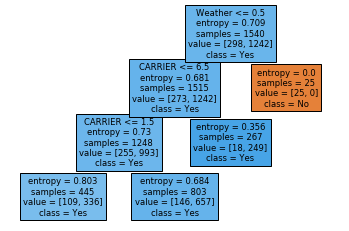

In [23]:
#create a list of features and orders them 
importances = pd.DataFrame({'predictor':X_train.columns,'importance':np.round(dtree.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
print(importances)
print()

#the next four lines of code will create the decision tree graphically.  
plt.figure()
plot_tree(dtree, filled=True, feature_names=predictors, class_names=['No','Yes'])
plt.savefig('treePlot.pdf')
plt.show()
